<a href="https://colab.research.google.com/github/sasa10th/battery/blob/main/%5B2025%EA%B1%B4_%EC%A0%84_%EC%A7%80_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EC%A3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 주제
* 모둠원 이름: 이홍균, 신재윤, 김지환
* 선정한 도서: 도시를 바꾸는 새
* 탐구 동기: (탐구 주제를 선정하게 된 동기나 궁금증이 생긴 이유 작성)
* 탐구 문제: (해결하고자 하는  문제 상황과 만들고자 하는 인공지능으로 확인하려는 내용)
* 관련 지속 가능 발전 목표:
* 입력 값 / 출력 값:

#1. 데이터 준비
* (데이터 소개)
* (데이터 출처)

> 데이터는 구글 드라이브 마운트를 활용하여 공유


1.   선생님이 제공한 구글 드라이브에 접속(분반별로 다름)하여 드라이브에 바로 가기 추가
 - 내 드라이브에 추가
2. 해당 드라이브에 데이터 파일 업로드
  - 데이터 파일 제목은 가급적 영문, _ 사용하여 한글, 띄어쓰기 없도록
3.   아래 코드 셀의 코드 중 업로드 한 파일의 경로를 바탕으로 구글 드라이브에서 불러오도록 함



In [ ]:
##구글 드라이브 마운트를 위해 아래 두 개 셀을 차례로 실행할 것
#해당 셀 실행 -> 연결 -> 계정 선택 -> 계속(전부 체크) -> 계속 확인
from google.colab import drive
drive.mount('/gdrive')

#하단에 "Mounted at /gdrive"가 출력되면 마운트 성공!

Mounted at /gdrive


In [ ]:
import pandas as pd
class_path = '/gdrive/Shareddrives/25-2_AI_data/3/battery/'

In [ ]:
df_temp = pd.read_csv(class_path+"output.csv", dtype=str)

In [ ]:
df_temp = df_temp.dropna(axis=1, how="all")
df_temp = df_temp.dropna(axis=0, how="all")

In [ ]:
df_temp.info()
print(df_temp.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23295 entries, 0 to 23294
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gbifID                  23295 non-null  object
 1   datasetKey              23295 non-null  object
 2   occurrenceID            23295 non-null  object
 3   kingdom                 23295 non-null  object
 4   phylum                  22590 non-null  object
 5   class                   16360 non-null  object
 6   order                   21870 non-null  object
 7   family                  22590 non-null  object
 8   genus                   22550 non-null  object
 9   species                 22401 non-null  object
 10  infraspecificEpithet    730 non-null    object
 11  taxonRank               23295 non-null  object
 12  scientificName          23295 non-null  object
 13  verbatimScientificName  23295 non-null  object
 14  countryCode             23295 non-null  object
 15  oc

In [ ]:
target_columns = [
    'species',
    'decimalLatitude',
    'decimalLongitude',
    'eventDate',
    'year',
    'month',
    'countryCode'
]

df_bird = df_temp[target_columns].copy()

print(df_bird.head())

                 species decimalLatitude decimalLongitude   eventDate  year  \
0      Dendrocopos major       37.687355       127.759039  2004-05-07  2004   
1  Dendronanthus indicus       37.066059       127.356516  2004-03-02  2004   
2        Cuculus canorus       35.401287       128.417157  2004-06-10  2004   
3             Otus sunia       36.601851       127.069433  2004-04-03  2004   
4        Cuculus canorus       35.604606       129.315823  2004-04-01  2004   

  month countryCode  
0     5          KR  
1     3          KR  
2     6          KR  
3     4          KR  
4     4          KR  


## ?. 환경 데이터 불러오기

In [ ]:
# import os
# import re
# import pandas as pd
# import unicodedata # Import unicodedata for normalization
# from tqdm import tqdm # Import tqdm for progress bar

# # Ensure class_path is defined from previous cells
# # class_path = '/gdrive/Shareddrives/25-2_AI_data/3/battery/'

# all_dataframes_list = [] # Will be populated with all loaded DataFrames

# # Regex patterns for different naming conventions
# pattern_2001_2013 = re.compile(r'(\d{4})년(\d{2})분기\.xlsx') # e.g., 2013년04분기.xlsx
# pattern_2014_2016 = re.compile(r'(\d{4})년 (\d)분기\.xlsx')   # e.g., 2014년 1분기.xlsx
# pattern_2017_2018 = re.compile(r'(\d{4})년 (\d{1,2})월\.xlsx')    # e.g., 2017년 07월.xlsx or 2018년 7월.xlsx

# file_info = []

# for filename in os.listdir(class_path):
#     normalized_filename = unicodedata.normalize('NFC', filename)

#     if normalized_filename.endswith('.xlsx'):
#         match_2001_2013 = pattern_2001_2013.match(normalized_filename)
#         match_2014_2016 = pattern_2014_2016.match(normalized_filename)
#         match_2017_2018 = pattern_2017_2018.match(normalized_filename)

#         year = None
#         period_type = None
#         period_value = None

#         if match_2001_2013:
#             year = int(match_2001_2013.group(1))
#             period_type = 'quarter'
#             period_value = int(match_2001_2013.group(2))
#         elif match_2014_2016:
#             year = int(match_2014_2016.group(1))
#             period_type = 'quarter'
#             period_value = int(match_2014_2016.group(2))
#         elif match_2017_2018:
#             year = int(match_2017_2018.group(1))
#             period_type = 'month'
#             period_value = int(match_2017_2018.group(2))
#         else:
#             continue

#         if year:
#             file_info.append({
#                 'year': year,
#                 'period_type': period_type,
#                 'period_value': period_value,
#                 'filename': normalized_filename
#             })

# file_info.sort(key=lambda x: (x['year'], x['period_value']))

# file_info

[{'year': 2001,
  'period_type': 'quarter',
  'period_value': 1,
  'filename': '2001년01분기.xlsx'},
 {'year': 2001,
  'period_type': 'quarter',
  'period_value': 2,
  'filename': '2001년02분기.xlsx'},
 {'year': 2001,
  'period_type': 'quarter',
  'period_value': 3,
  'filename': '2001년03분기.xlsx'},
 {'year': 2001,
  'period_type': 'quarter',
  'period_value': 4,
  'filename': '2001년04분기.xlsx'},
 {'year': 2002,
  'period_type': 'quarter',
  'period_value': 1,
  'filename': '2002년01분기.xlsx'},
 {'year': 2002,
  'period_type': 'quarter',
  'period_value': 2,
  'filename': '2002년02분기.xlsx'},
 {'year': 2002,
  'period_type': 'quarter',
  'period_value': 3,
  'filename': '2002년03분기.xlsx'},
 {'year': 2002,
  'period_type': 'quarter',
  'period_value': 4,
  'filename': '2002년04분기.xlsx'},
 {'year': 2003,
  'period_type': 'quarter',
  'period_value': 1,
  'filename': '2003년01분기.xlsx'},
 {'year': 2003,
  'period_type': 'quarter',
  'period_value': 2,
  'filename': '2003년02분기.xlsx'},
 {'year': 2003,
  'p

In [ ]:
# import pandas as pd
# import os

# # 1. Define a list of column names for the aggregated CSV
# column_names = ['year', 'month', '측정소명', 'SO2', 'CO', 'O3', 'NO2', 'PM10']

# # 2. Create an empty Pandas DataFrame with these specified column names
# df_aggregated = pd.DataFrame(columns=column_names)

# # 3. Construct the full path for the output CSV file
# output_filename = 'aggregated_environmental_data.csv'
# output_filepath = os.path.join(class_path, output_filename)

# # 4. Save the empty DataFrame to the specified CSV path, ensuring headers are written and any existing file is overwritten
# df_aggregated.to_csv(output_filepath, index=False, encoding='utf-8-sig')

# print(f"Initialized empty aggregated CSV file at: {output_filepath}")
# print("Columns initialized:", df_aggregated.columns.tolist())

Initialized empty aggregated CSV file at: /gdrive/Shareddrives/25-2_AI_data/3/battery/aggregated_environmental_data.csv
Columns initialized: ['year', 'month', '측정소명', 'SO2', 'CO', 'O3', 'NO2', 'PM10']


In [ ]:
# import pandas as pd
# import numpy as np
# import os
# from tqdm import tqdm

# # 1. Define pollutant columns and columns to be selected
# pollutant_columns = ['SO2', 'CO', 'O3', 'NO2', 'PM10']
# initial_selected_columns = ['측정소명', '측정일시', '주소'] + pollutant_columns

# # Ensure class_path is defined from previous cells
# # class_path = '/gdrive/Shareddrives/25-2_AI_data/3/battery/'

# # Get output file path from previous step
# output_filename = 'aggregated_environmental_data.csv'
# output_filepath = os.path.join(class_path, output_filename)

# # Re-scan for file_info as the kernel might have reset or for robustness
# # This part is copied from the previous cell Ph_uHBKhM_7N to ensure file_info is up-to-date
# import re
# import unicodedata

# file_info = []
# pattern_2001_2013 = re.compile(r'(\d{4})년(\d{2})분기\.xlsx')
# pattern_2014_2016 = re.compile(r'(\d{4})년 (\d)분기\.xlsx')
# pattern_2017_2018 = re.compile(r'(\d{4})년 (\d{1,2})월\.xlsx')

# for filename in os.listdir(class_path):
#     normalized_filename = unicodedata.normalize('NFC', filename)
#     if normalized_filename.endswith('.xlsx'):
#         match_2001_2013 = pattern_2001_2013.match(normalized_filename)
#         match_2014_2016 = pattern_2014_2016.match(normalized_filename)
#         match_2017_2018 = pattern_2017_2018.match(normalized_filename)

#         year = None
#         period_type = None
#         period_value = None

#         if match_2001_2013:
#             year = int(match_2001_2013.group(1))
#             period_type = 'quarter'
#             period_value = int(match_2001_2013.group(2))
#         elif match_2014_2016:
#             year = int(match_2014_2016.group(1))
#             period_type = 'quarter'
#             period_value = int(match_2014_2016.group(2))
#         elif match_2017_2018:
#             year = int(match_2017_2018.group(1))
#             period_type = 'month'
#             period_value = int(match_2017_2018.group(2))
#         else:
#             continue

#         if year:
#             file_info.append({
#                 'year': year,
#                 'period_type': period_type,
#                 'period_value': period_value,
#                 'filename': normalized_filename
#             })
# file_info.sort(key=lambda x: (x['year'], x['period_value']))
# # End of re-scanning for file_info

# # 4. Loop through each file in the file_info list
# for info in tqdm(file_info, desc="Processing XLSX files and aggregating data"):
#     file_path = os.path.join(class_path, info['filename'])
#     try:
#         # 5. Load each XLSX file into a Pandas DataFrame
#         df = pd.read_excel(file_path)

#         # 6. Standardize the date column: if a column named 'DATA_TINE' exists, rename it to '측정일시'.
#         if 'DATA_TINE' in df.columns:
#             df = df.rename(columns={'DATA_TINE': '측정일시'})

#         # Filter out rows where '측정소명' is missing or not a string
#         df = df[df['측정소명'].notna() & df['측정소명'].apply(lambda x: isinstance(x, str))].copy()

#         # 7. Convert the '측정일시' column to datetime objects
#         df['측정일시'] = pd.to_datetime(df['측정일시'], errors='coerce', format='%Y%m%d%H', exact=False)

#         # Drop rows where '측정일시' conversion failed
#         df.dropna(subset=['측정일시'], inplace=True)

#         # 8. Extract the 'year' and 'month' from the '측정일시' column
#         df['year'] = df['측정일시'].dt.year
#         df['month'] = df['측정일시'].dt.month

#         # 9. Select only the specified columns (pollutants, '측정소명', 'year', 'month')
#         # '주소' is dropped here as it's not part of the final aggregated output columns
#         current_columns = ['year', 'month', '측정소명'] + pollutant_columns
#         df_processed = df[current_columns].copy()

#         # 10. Replace missing values and convert pollutant columns to numeric
#         for col in pollutant_columns:
#             # Replace common placeholder missing values (e.g., '-999', '-999.0', ' ') with NaN
#             df_processed[col] = df_processed[col].replace([-999, '-999', '-999.0', ' '], np.nan)
#             df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')

#         # Drop rows where all pollutant values are NaN, as these rows wouldn't contribute to the mean
#         df_processed.dropna(subset=pollutant_columns, how='all', inplace=True)

#         # 11. Group by 'year', 'month', and '측정소명' and calculate the mean for numeric columns
#         df_aggregated_current_file = df_processed.groupby(['year', 'month', '측정소명'], as_index=False)[pollutant_columns].mean()

#         # 12. Append the resulting aggregated data to the aggregated_environmental_data.csv file
#         # Use mode='a' for append mode, header=False to avoid writing headers again, and index=False
#         df_aggregated_current_file.to_csv(output_filepath, mode='a', header=False, index=False, encoding='utf-8-sig')

#     except Exception as e:
#         print(f"Error processing file {info['filename']}: {e}")

# print(f"All XLSX files processed and aggregated data saved to {output_filepath}")

Processing XLSX files and aggregating data: 100%|██████████| 88/88 [1:32:41<00:00, 63.20s/it]

All XLSX files processed and aggregated data saved to /gdrive/Shareddrives/25-2_AI_data/3/battery/aggregated_environmental_data.csv


## ?. Kakao REST API

In [ ]:
# import pandas as pd
# import os

# # Construct the full path to the CSV file
# address_matching_csv_path = os.path.join(class_path, 'address_matching.csv')

# # Load the CSV file into a DataFrame
# df_address_matching = pd.read_csv(address_matching_csv_path)

# df_address_matching

,측정소명,주소,longitude,latitude
0,옥천동,강원특별자치도 강릉시 경강로 2179(옥천동 327-2),128.902901,37.760146
1,간성읍,강원특별자치도 고성군 간성읍,128.466856,38.378382
2,상리,강원특별자치도 고성군 간성읍 수성로 160,128.463725,38.381188
3,천곡동,강원특별자치도 동해시 천곡로 77(천곡동 806),129.114353,37.524716
4,남양동1,강원특별자치도 삼척시 남양길 11(남양동 331-9),129.168368,37.442639
...,...,...,...,...
393,성거읍,충청남도 천안시 서북구 성거읍 천흥8길 7,127.207379,36.883467
394,백석동,충청남도 천안시 서북구 음봉로 861-50,127.104606,36.828034
395,영동읍,충청북도 영동군 영동읍 계산로2길 25,127.777791,36.172753
396,도안면,충청북도 증평군 도안면 문화마을길 8,127.612663,36.813554


In [ ]:
# import requests
# from google.colab import userdata
# import pandas as pd

# # Kakao API URL and headers must be defined in this cell
# url = 'https://dapi.kakao.com/v2/local/search/address.json'
# headers = {'Authorization': f'KakaoAK {userdata.get('kapi')}'}

# # 1. Initialize an empty list named address_coordinates
# address_coordinates = []

# # 2. Iterate through each row of the df_address_matching DataFrame
# for index, row in df_address_matching.iterrows():
#     # 3. For each row, extract the '주소' (address) value.
#     address = row['주소']

#     longitude = None
#     latitude = None

#     if pd.notna(address) and address.strip(): # Ensure address is not NaN or empty
#         try:
#             # 4. Construct the API request and 5. Make the API call
#             response = requests.get(url, headers=headers, params={'query': address, 'size': 1})
#             data = response.json()

#             # 6. Check the API response for success and extract coordinates
#             if response.status_code == 200 and data['documents']:
#                 longitude = data['documents'][0]['x']
#                 latitude = data['documents'][0]['y']
#         except requests.exceptions.RequestException as e:
#             print(f"API request failed for address '{address}': {e}")
#         except Exception as e:
#             print(f"Error processing API response for address '{address}': {e}")

#     # 8. Append a list containing the original address, extracted longitude, and extracted latitude
#     address_coordinates.append([address, longitude, latitude])

# # 9. Create a new Pandas DataFrame named df_coords from the address_coordinates list
# df_coords = pd.DataFrame(address_coordinates, columns=['주소', 'longitude', 'latitude'])

# # 10. Convert the 'longitude' and 'latitude' columns in df_coords to numeric type
# df_coords['longitude'] = pd.to_numeric(df_coords['longitude'], errors='coerce')
# df_coords['latitude'] = pd.to_numeric(df_coords['latitude'], errors='coerce')

# # 11. Merge df_address_matching with df_coords on the '주소' column
# df_address_matching = df_address_matching.merge(df_coords, on='주소', how='left')

# print("df_address_matching updated with longitude and latitude:")
# print(df_address_matching.head())
# print(df_address_matching.info())

df_address_matching updated with longitude and latitude:
   측정소명                               주소  longitude_x  latitude_x  \
0   옥천동  강원특별자치도 강릉시 경강로 2179(옥천동 327-2)          NaN         NaN   
1   간성읍                  강원특별자치도 고성군 간성읍          NaN         NaN   
2    상리          강원특별자치도 고성군 간성읍 수성로 160          NaN         NaN   
3   천곡동      강원특별자치도 동해시 천곡로 77(천곡동 806)          NaN         NaN   
4  남양동1    강원특별자치도 삼척시 남양길 11(남양동 331-9)          NaN         NaN   

   longitude_y  latitude_y  
0   128.902901   37.760146  
1   128.466856   38.378382  
2   128.463725   38.381188  
3   129.114353   37.524716  
4   129.168368   37.442639  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   측정소명         398 non-null    object 
 1   주소           398 non-null    object 
 2   longitude_x  0 non-null      float64
 3   latitude_x   0 non-null      float6

In [ ]:
# import pandas as pd

# # Drop the original longitude and latitude columns (which are all NaN from previous steps)
# df_address_matching = df_address_matching.drop(columns=['longitude_x', 'latitude_x'])

# # Rename the newly merged columns to the desired names
# df_address_matching = df_address_matching.rename(columns={'longitude_y': 'longitude', 'latitude_y': 'latitude'})

# # Display the head and info of the updated DataFrame
# print("df_address_matching after cleanup:")
# print(df_address_matching.head())
# print(df_address_matching.info())

df_address_matching after cleanup:
   측정소명                               주소   longitude   latitude
0   옥천동  강원특별자치도 강릉시 경강로 2179(옥천동 327-2)  128.902901  37.760146
1   간성읍                  강원특별자치도 고성군 간성읍  128.466856  38.378382
2    상리          강원특별자치도 고성군 간성읍 수성로 160  128.463725  38.381188
3   천곡동      강원특별자치도 동해시 천곡로 77(천곡동 806)  129.114353  37.524716
4  남양동1    강원특별자치도 삼척시 남양길 11(남양동 331-9)  129.168368  37.442639
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   측정소명       398 non-null    object 
 1   주소         398 non-null    object 
 2   longitude  379 non-null    float64
 3   latitude   379 non-null    float64
dtypes: float64(2), object(2)
memory usage: 12.6+ KB
None


In [ ]:
# import os

# # Construct the full path to the CSV file
# address_matching_csv_path = os.path.join(class_path, 'address_matching.csv')

# # Save the df_address_matching DataFrame to CSV, without the index
# df_address_matching.to_csv(address_matching_csv_path, index=False, encoding='utf-8-sig')

# print(f"Updated df_address_matching (with coordinates) saved to: {address_matching_csv_path}")

Updated df_address_matching (with coordinates) saved to: /gdrive/Shareddrives/25-2_AI_data/3/battery/address_matching.csv


# ?. 환경-주소(좌표) 매칭

In [ ]:
import pandas as pd
import os

# Path to the aggregated environmental data CSV
aggregated_env_data_path = os.path.join(class_path, 'aggregated_environmental_data.csv')
# Path to the address matching CSV
address_matching_csv_path = os.path.join(class_path, 'address_matching.csv')

# Load the aggregated environmental data
df_environmental = pd.read_csv(aggregated_env_data_path)

# Load the address matching data
df_address_matching = pd.read_csv(address_matching_csv_path)

# Merge the two DataFrames on '측정소명'
# Using a left merge to keep all environmental data and add addresses where a match is found
df_merged = pd.merge(df_environmental, df_address_matching, on='측정소명', how='left')

print("Merged DataFrame head:")
print(df_merged.head())

print("\nNumber of rows with missing addresses after merge:")
print(df_merged['주소'].isnull().sum())

Merged DataFrame head:
   year  month  측정소명       SO2        CO        O3       NO2       PM10  \
0  2001      1  가음정동  0.006909  0.794376  0.015056  0.022476  55.838134   
1  2001      1   간성읍  0.005200       NaN       NaN  0.001912        NaN   
2  2001      1   강남구  0.006792  1.643280  0.009388  0.034728  74.916667   
3  2001      1   강동구  0.004774  1.459777  0.006701  0.044275  96.346361   
4  2001      1   강북구  0.007588  1.276113  0.006263  0.054375  74.363354   

                   주소   longitude   latitude  
0                 NaN         NaN        NaN  
1     강원특별자치도 고성군 간성읍  128.466856  38.378382  
2      서울 강남구 학동로 426  127.047060  37.517968  
3  서울 강동구 구천면로 42길 59  127.136820  37.545004  
4  서울 강북구 삼양로 139길 49  127.011870  37.647934  

Number of rows with missing addresses after merge:
6780


In [ ]:
import pandas as pd

# Drop rows where any column has a NaN value (default how='any')
df_merged_cleaned = df_merged.dropna()

print("모든 열의 결측치 행 제거 후 Merged DataFrame head:")
print(df_merged_cleaned.head())

print("\n모든 열의 결측치 행 제거 후 df_merged_cleaned의 총 행 수:")
print(len(df_merged_cleaned))

print("\n모든 열의 결측치 행 제거 후 df_merged_cleaned의 결측치 개수 (전체 컬럼 확인용):\n")
# Print null sum for all columns to confirm no NaNs remain
print(df_merged_cleaned.isnull().sum())

모든 열의 결측치 행 제거 후 Merged DataFrame head:
   year  month 측정소명       SO2        CO        O3       NO2       PM10  \
2  2001      1  강남구  0.006792  1.643280  0.009388  0.034728  74.916667   
3  2001      1  강동구  0.004774  1.459777  0.006701  0.044275  96.346361   
4  2001      1  강북구  0.007588  1.276113  0.006263  0.054375  74.363354   
5  2001      1  강서구  0.005521  0.824688  0.010426  0.037748  67.598611   
7  2001      1  경화동  0.005247  0.812534  0.024065  0.018678  43.804348   

                         주소   longitude   latitude  
2            서울 강남구 학동로 426  127.047060  37.517968  
3        서울 강동구 구천면로 42길 59  127.136820  37.545004  
4        서울 강북구 삼양로 139길 49  127.011870  37.647934  
5  서울 강서구 강서로 45 다길 71 화곡3동  126.835171  37.544657  
7     경남 창원시 진해구 경화로16번길 31  128.689558  35.154977  

모든 열의 결측치 행 제거 후 df_merged_cleaned의 총 행 수:
48515

모든 열의 결측치 행 제거 후 df_merged_cleaned의 결측치 개수 (전체 컬럼 확인용):

year         0
month        0
측정소명         0
SO2          0
CO           0
O3           0

## ?. 전체 데이터 통합

In [23]:
import pandas as pd
import os

# Construct the full path to the CSV file
grid_with_env_csv_path = os.path.join(class_path, 'grid_with_env.csv')

# Load the CSV file into a DataFrame named df
df = pd.read_csv(grid_with_env_csv_path)

print(df.head())

   year  grid_lat  grid_lon  count  temp_avg  prec_sum  wind_speed  \
0  2013      36.0     124.0   3222     13.95      1.92        5.17   
1  2009      37.6     127.8    101     10.00      3.48        1.99   
2  2009      37.7     127.9     77      8.80      3.50        2.10   
3  2006      36.8     128.1     62      9.52      3.69        2.18   
4  2009      37.7     127.8     60     10.00      3.48        1.99   

   soil_moist  humidity   solar  
0        1.00     78.92  3.9502  
1        0.78     78.69  3.8364  
2        0.72     79.05  3.8364  
3        0.74     81.56  3.8129  
4        0.78     78.69  3.8364  


In [24]:
df_merged_cleaned['latitude'] = df_merged_cleaned['latitude'].round(1)
df_merged_cleaned['longitude'] = df_merged_cleaned['longitude'].round(1)

print("df_merged_cleaned after rounding latitude and longitude:")
print(df_merged_cleaned.head())

df_merged_cleaned after rounding latitude and longitude:
   year  month 측정소명       SO2        CO        O3       NO2       PM10  \
2  2001      1  강남구  0.006792  1.643280  0.009388  0.034728  74.916667   
3  2001      1  강동구  0.004774  1.459777  0.006701  0.044275  96.346361   
4  2001      1  강북구  0.007588  1.276113  0.006263  0.054375  74.363354   
5  2001      1  강서구  0.005521  0.824688  0.010426  0.037748  67.598611   
7  2001      1  경화동  0.005247  0.812534  0.024065  0.018678  43.804348   

                         주소  longitude  latitude  
2            서울 강남구 학동로 426      127.0      37.5  
3        서울 강동구 구천면로 42길 59      127.1      37.5  
4        서울 강북구 삼양로 139길 49      127.0      37.6  
5  서울 강서구 강서로 45 다길 71 화곡3동      126.8      37.5  
7     경남 창원시 진해구 경화로16번길 31      128.7      35.2  


/tmp/ipython-input-1871972834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_cleaned['latitude'] = df_merged_cleaned['latitude'].round(1)
/tmp/ipython-input-1871972834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_cleaned['longitude'] = df_merged_cleaned['longitude'].round(1)


In [25]:
pollutant_columns = ['SO2', 'CO', 'O3', 'NO2', 'PM10']
df_env = df_merged_cleaned.groupby(['year', 'latitude', 'longitude'])[pollutant_columns].mean().reset_index()

print("df_env head after grouping and aggregation:")
print(df_env.head())
print("\ndf_env info:")
print(df_env.info())

df_env head after grouping and aggregation:
   year  latitude  longitude       SO2        CO        O3       NO2  \
0  2001      33.3      126.2  0.001372  0.408052  0.041358  0.004144   
1  2001      33.5      126.5  0.004188  0.530510  0.030634  0.022131   
2  2001      34.7      128.6  0.002998  0.553812  0.032353  0.005948   
3  2001      34.8      126.4  0.004527  0.466172  0.025753  0.015012   
4  2001      34.9      127.7  0.007346  0.504844  0.032977  0.021316   

        PM10  
0  34.186685  
1  46.523272  
2  36.380205  
3  32.672565  
4  56.383556  

df_env info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2230 non-null   int64  
 1   latitude   2230 non-null   float64
 2   longitude  2230 non-null   float64
 3   SO2        2230 non-null   float64
 4   CO         2230 non-null   float64
 5   O3         2230 non-null   f

In [26]:
# Rename columns in df to match df_env's coordinate column names for merging
df_renamed = df.rename(columns={'grid_lat': 'latitude', 'grid_lon': 'longitude'})

# Perform an inner merge on 'year', 'latitude', and 'longitude'
df_final = pd.merge(df_env, df_renamed, on=['year', 'latitude', 'longitude'], how='inner')

print("Merged DataFrame (df_final) head:")
print(df_final)
print("\nMerged DataFrame (df_final) info:")
print(df_final.info())

Merged DataFrame (df_final) head:
     year  latitude  longitude       SO2        CO        O3       NO2  \
0    2001      35.6      127.2  0.003084  0.585592  0.024646  0.006130   
1    2001      36.1      128.4  0.009608  0.783177  0.021644  0.029290   
2    2001      36.7      126.1  0.001870  0.284127  0.035120  0.006725   
3    2001      36.7      127.8  0.002062  0.621981  0.018344  0.005769   
4    2001      37.0      127.1  0.007161  0.902891  0.019247  0.031589   
..    ...       ...        ...       ...       ...       ...       ...   
354  2018      37.4      128.1  0.001770  0.305283  0.031539  0.006834   
355  2018      37.4      128.4  0.001485  0.438505  0.028915  0.009502   
356  2018      37.4      129.2  0.002435  0.378479  0.031214  0.014424   
357  2018      37.5      128.0  0.001673  0.645027  0.013902  0.018015   
358  2018      38.2      127.9  0.000945  0.243451  0.029077  0.004954   

          PM10  count  temp_avg  prec_sum  wind_speed  soil_moist  humidity  

Correlation matrix of df_final:

                year  latitude  longitude       SO2        CO        O3  \
year        1.000000 -0.036960  -0.091134 -0.326840 -0.361943  0.274899   
latitude   -0.036960  1.000000  -0.245385  0.007811  0.301762 -0.154180   
longitude  -0.091134 -0.245385   1.000000  0.102158 -0.135182  0.076302   
SO2        -0.326840  0.007811   0.102158  1.000000  0.441666 -0.370932   
CO         -0.361943  0.301762  -0.135182  0.441666  1.000000 -0.463820   
O3          0.274899 -0.154180   0.076302 -0.370932 -0.463820  1.000000   
NO2        -0.155545  0.308041  -0.122330  0.526592  0.584415 -0.693780   
PM10       -0.549203  0.342460  -0.185075  0.385841  0.432510 -0.428128   
count      -0.072196 -0.036856   0.003305 -0.029705 -0.054545  0.066781   
temp_avg   -0.015063 -0.620779   0.260815  0.060920 -0.247994  0.253492   
prec_sum   -0.160728 -0.276772   0.168564 -0.026585 -0.049614 -0.114413   
wind_speed -0.225602 -0.274754   0.339642  0.121835 -0.107234  0.27

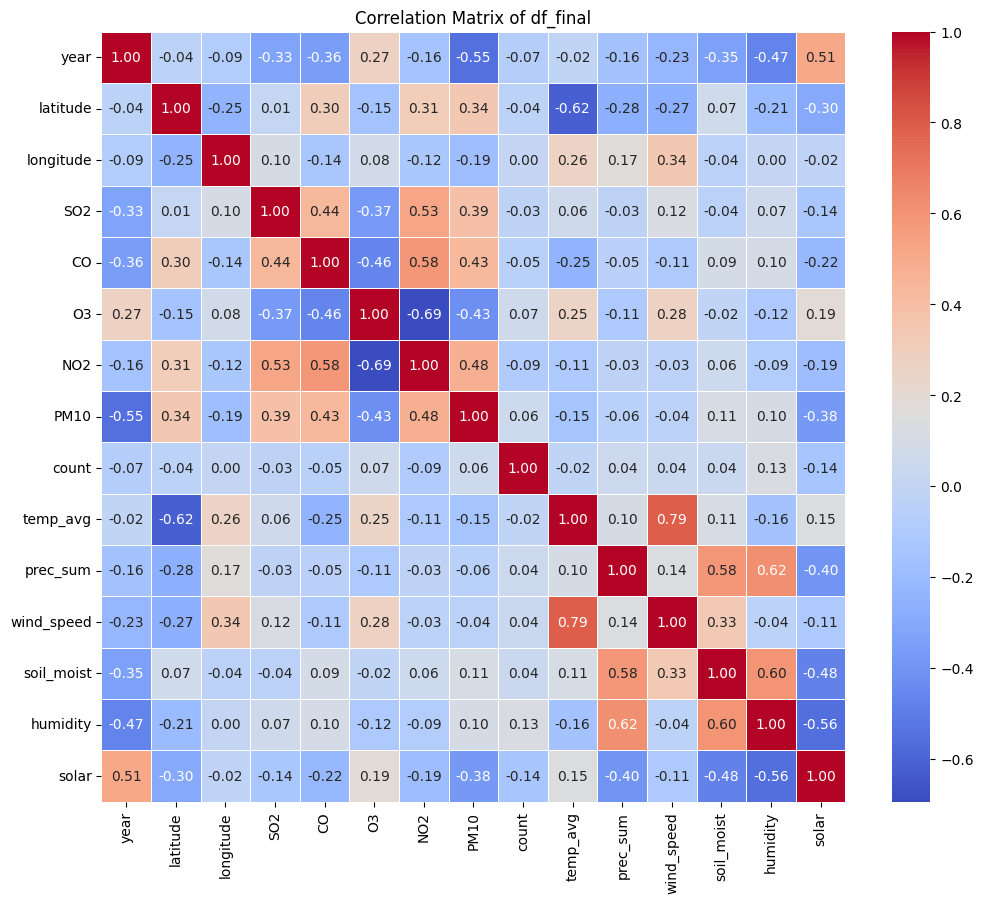

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for df_final
correlation_matrix = df_final.corr(numeric_only=True)

print("Correlation matrix of df_final:\n")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of df_final')
plt.show()














#2. 탐색적 데이터 분석

#3. 모델 구현
* (사용한 알고리즘)

#4. 모델 평가

#5. 결과 확인 및 해석


#6. 활용 방안 및 기대 효과
* (활용 방안)
* (기대 효과)

# Task
Round 'latitude' and 'longitude' columns in `df_merged_cleaned` to one decimal place, then group `df_merged_cleaned` by 'year', 'latitude', and 'longitude', calculating the mean for 'SO2', 'CO', 'O3', 'NO2', and 'PM10' to create a new DataFrame `df_env`.

## Round coordinates

### Subtask:
Round 'latitude' and 'longitude' columns in df_merged_cleaned to one decimal place.


**Reasoning**:
The subtask requires rounding the 'latitude' and 'longitude' columns to one decimal place. I will use the `.round()` method for this operation on both columns in `df_merged_cleaned`.



**Reasoning**:
I have successfully rounded the latitude and longitude columns and confirmed the output. The next instruction is to group the `df_merged_cleaned` DataFrame by 'year', 'latitude', and 'longitude' and calculate the mean of the specified pollutant columns to create a new DataFrame called `df_env`.



## Summary:

### Data Analysis Key Findings
*   The 'latitude' and 'longitude' columns in `df_merged_cleaned` were successfully rounded to one decimal place, as confirmed by the `df_merged_cleaned.head()` output.
*   A new DataFrame, `df_env`, was created by grouping `df_merged_cleaned` by 'year', 'latitude', and 'longitude'.
*   `df_env` contains the mean values for 'SO2', 'CO', 'O3', 'NO2', and 'PM10' pollutants, aggregated at each unique combination of year and one-decimal-place coordinates.

### Insights or Next Steps
*   The `df_env` DataFrame provides a summarized view of pollutant levels per year at specific geographic locations, which is suitable for spatial-temporal analysis of air quality.
*   This aggregated data can be used to visualize pollution trends over time and across different locations, or to identify areas with persistently high pollutant concentrations.
